In [1]:
import sys
sys.path.append('/mydata/watres/quentin/code/FLOW/hourly_analysis/')
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import os
import GAMCR

ls_stations = ['Pully', 'Basel', 'Lugano']
ls_modes = ['flashy', 'notflashy']
all_sites = ['{0}_{1}'.format(station, mode) for station in ls_stations for mode in ls_modes]


from get_data_from_ERRA import *
dfERRA = get_data_from_ERRA()

/tmp/ipykernel_59096/817489059.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


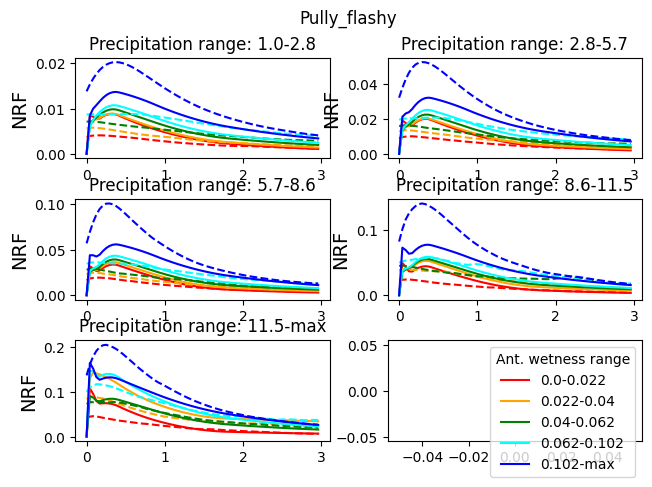

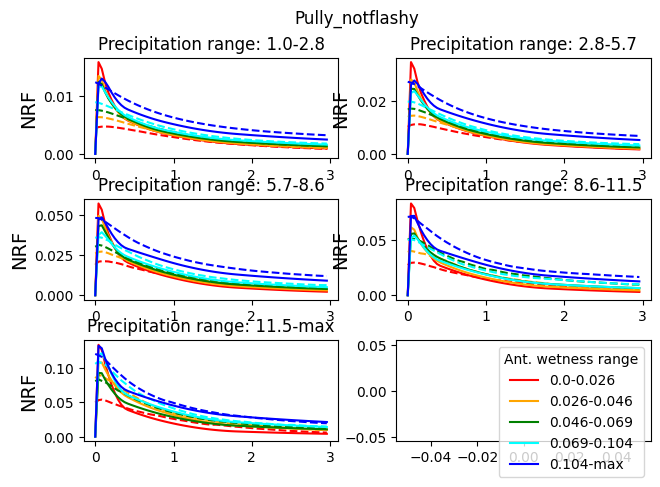

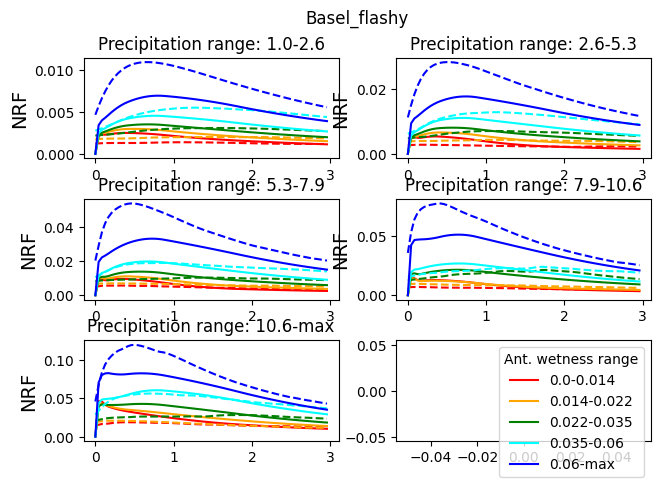

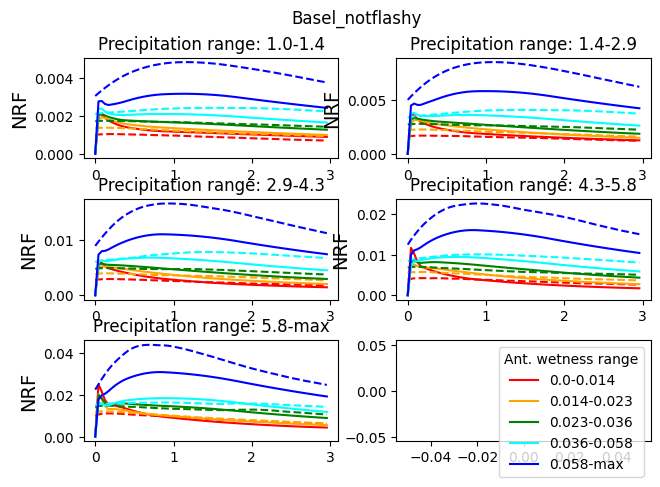

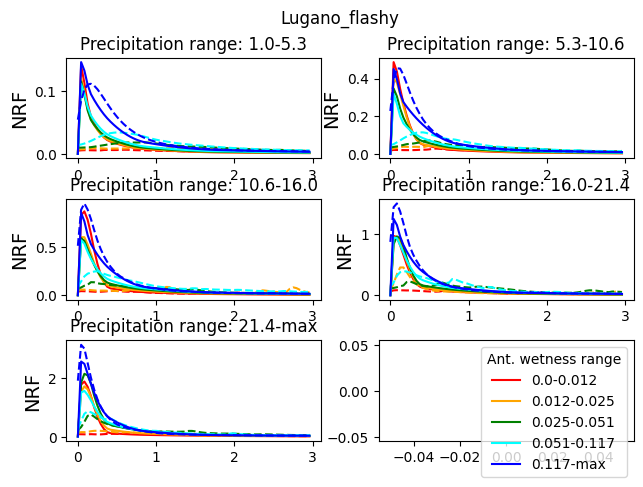

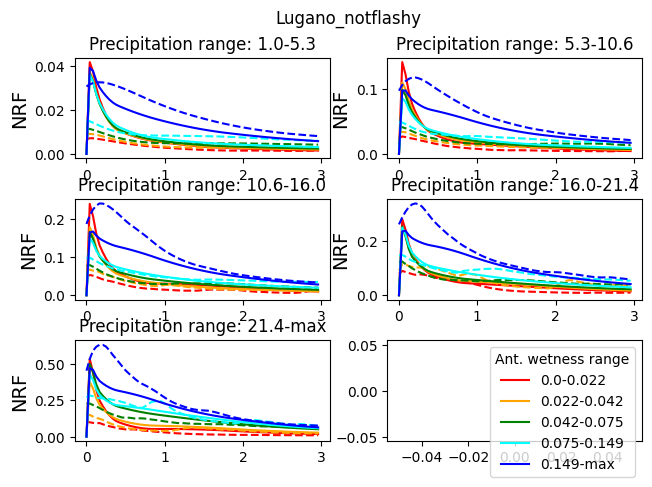

In [2]:
for site in all_sites:
    site_folder = '/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/simulated_data/{0}/'.format(site)
    GAMCR.resultsanalysis.show_tf_p_q(site_folder, site, stratif_wetness=False, alpha=0.05, maxT=24*3)

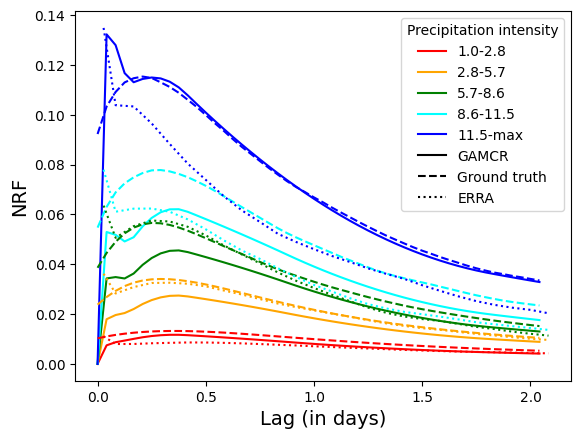

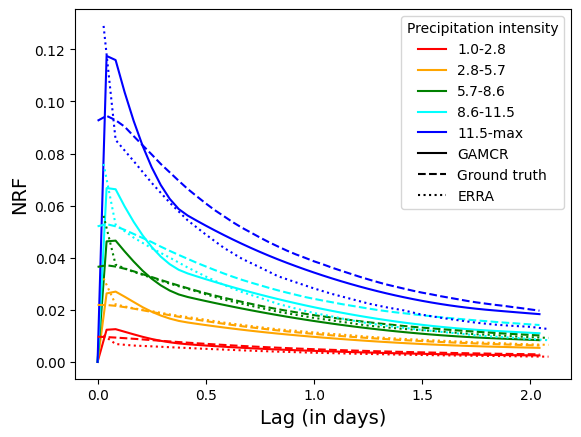

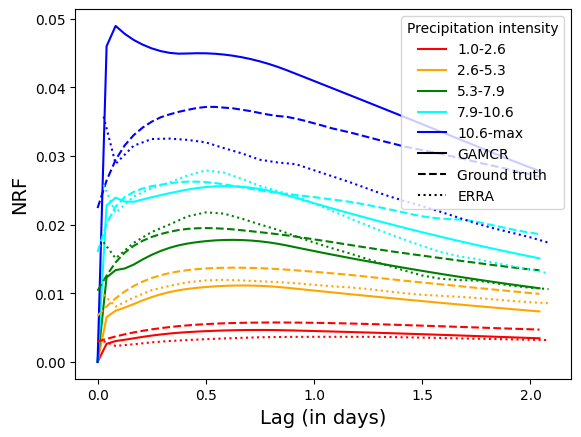

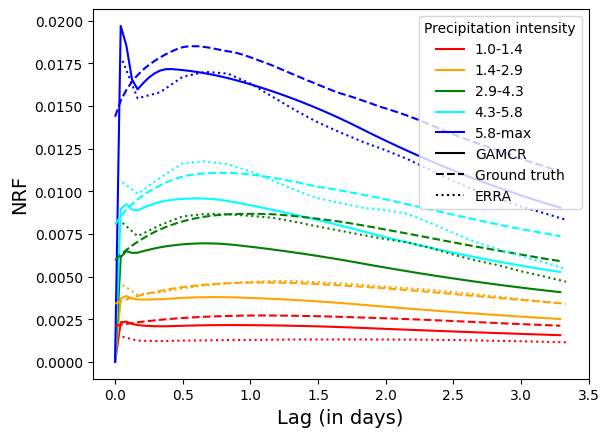

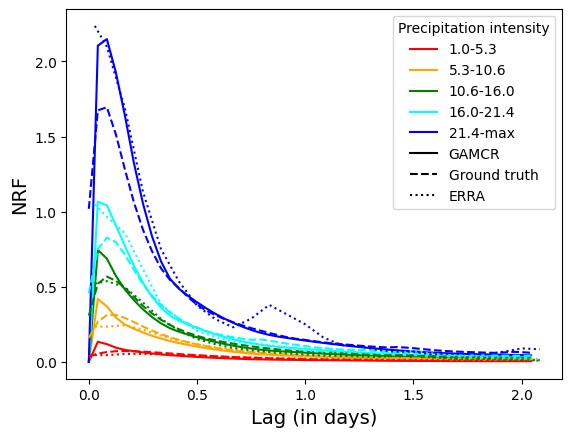

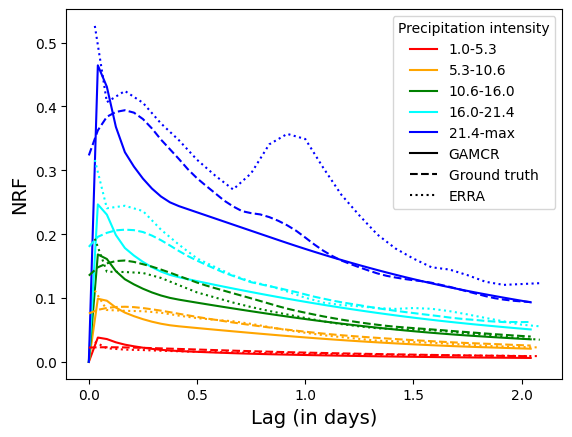

In [3]:
for site in all_sites:
    site_folder = '/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/simulated_data/{0}/'.format(site)
    GAMCR.resultsanalysis.show_tf_p_or_q(site_folder, site, stratif_wetness=False, maxT=24*10, weighted=True, dataERRA=dfERRA[site], figname='NRF_quantiles_{0}'.format(site))

# Global response

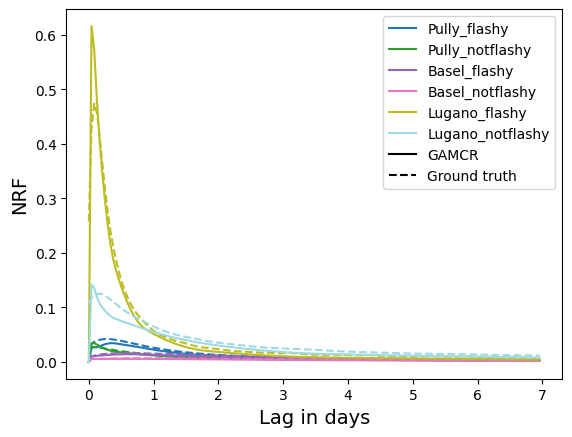

In [4]:
global_path = '/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/simulated_data/'
GAMCR.resultsanalysis.show_tf_global(global_path, all_sites, log_abs=False, log_ordo=False, weighted=True, alpha=0.025, maxT=7*24)

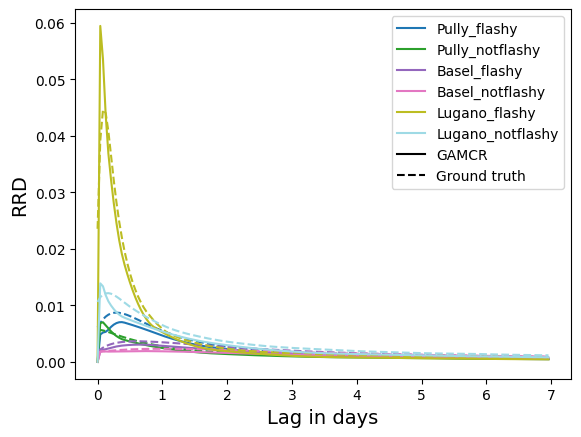

In [5]:
GAMCR.resultsanalysis.show_tf_global(global_path, all_sites, log_abs=False, log_ordo=False, weighted=False, alpha=0.025, maxT=7*24)

/mydata/watres/quentin/code/FLOW/hourly_analysis/GAMCR/resultsanalysis/visualization_tools.py:269: RuntimeWarning: divide by zero encountered in log10
  abs = np.log10(x[:maxT])
/mydata/watres/quentin/code/FLOW/hourly_analysis/GAMCR/resultsanalysis/visualization_tools.py:274: RuntimeWarning: divide by zero encountered in log10
  plt.plot(abs,np.log10(tf[:maxT]), color=colors[id_site], label=site)


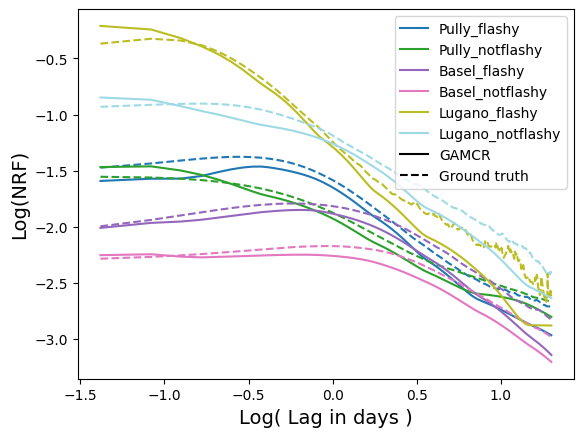

In [6]:
GAMCR.resultsanalysis.show_tf_global(global_path, all_sites, log_abs=True, log_ordo=True, weighted=True, alpha=0.025, maxT=20*24, figsave=True)

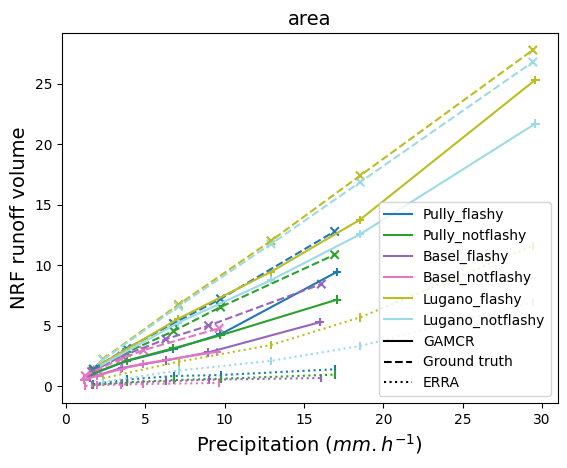

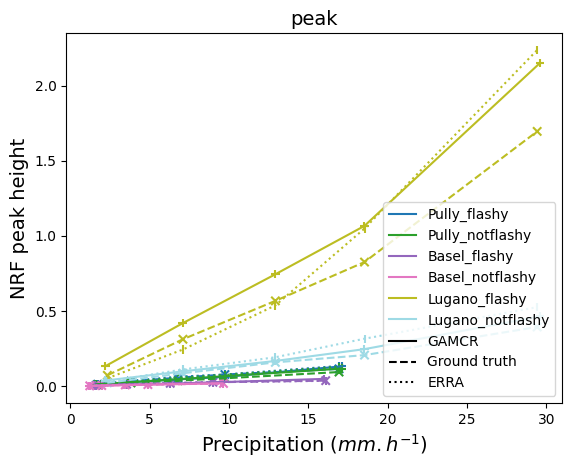

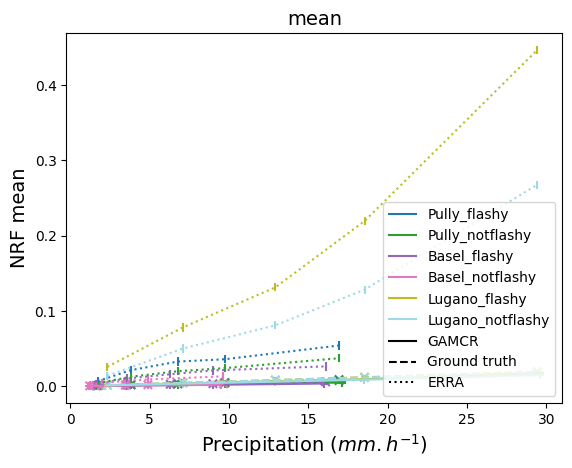

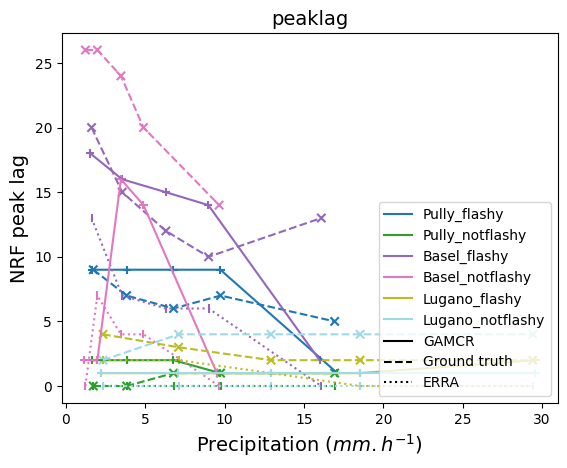

In [8]:
GAMCR.resultsanalysis.show_vs_precip_intensity(global_path, all_sites, weighted=True, log_ordo=False, dataERRA=dfERRA)

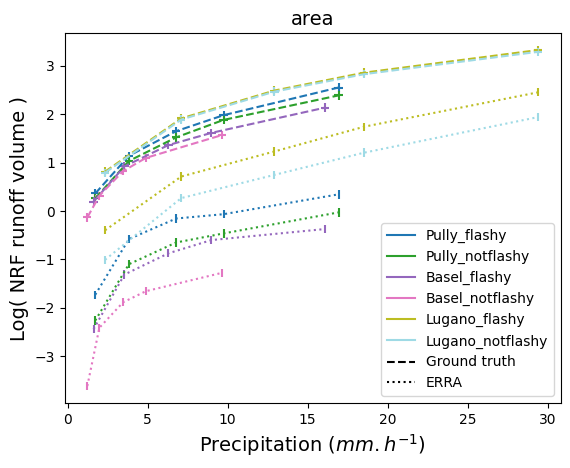

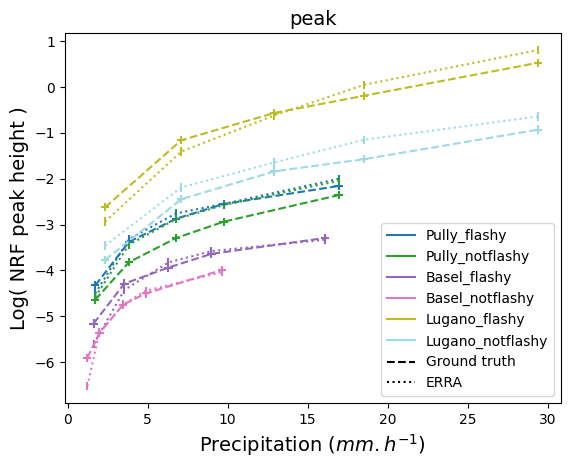

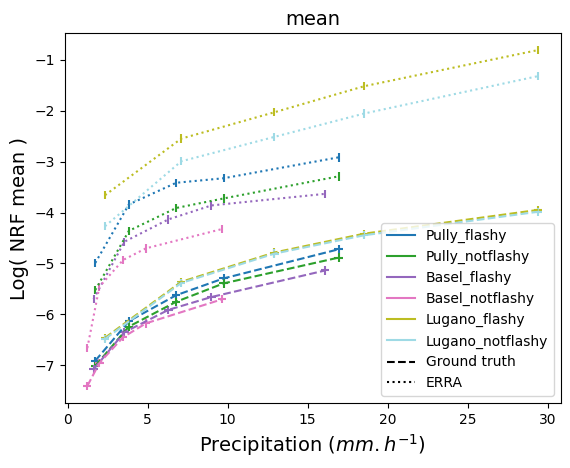

/mydata/watres/quentin/code/FLOW/hourly_analysis/GAMCR/resultsanalysis/visualization_tools.py:510: RuntimeWarning: divide by zero encountered in log
  plt.scatter(stats_true['quantiles'][site], np.log(erra_stats), marker='|', c=[colors[id_station] for gh in range(K)])
/mydata/watres/quentin/code/FLOW/hourly_analysis/GAMCR/resultsanalysis/visualization_tools.py:511: RuntimeWarning: divide by zero encountered in log
  plt.plot(stats_true['quantiles'][site], np.log(erra_stats), linestyle=':', c=colors[id_station])
/mydata/watres/quentin/code/FLOW/hourly_analysis/GAMCR/resultsanalysis/visualization_tools.py:506: RuntimeWarning: divide by zero encountered in log
  plt.scatter(stats_true['quantiles'][site], np.log(stats_true[stat][site]), marker='+', c=[colors[id_station] for gh in range(K)])
/mydata/watres/quentin/code/FLOW/hourly_analysis/GAMCR/resultsanalysis/visualization_tools.py:507: RuntimeWarning: divide by zero encountered in log
  plt.plot(stats_true['quantiles'][site], np.log(stat

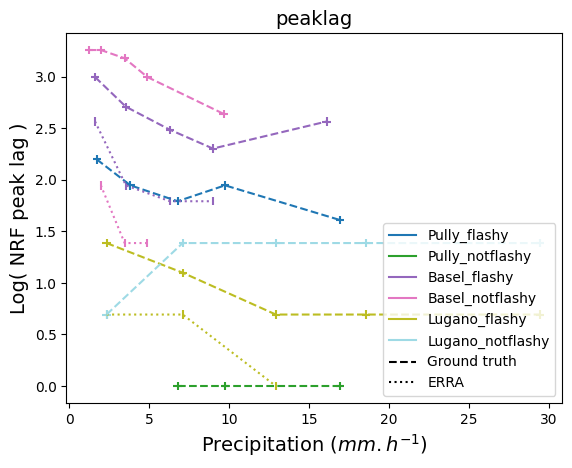

In [7]:
GAMCR.resultsanalysis.show_vs_precip_intensity(global_path, all_sites, weighted=True, log_ordo=True, dataERRA=dfERRA, show_GAMCR=False, figsave=True)